In [148]:
import numpy as np
import matplotlib.pyplot as plt

In [188]:
R = 0.03
r = np.linspace(0, R, 200)
theta = np.linspace(0, 2*np.pi, 300)

In [189]:
#setting up the meshgrid:
theta_matrix, radius_matrix = np.meshgrid(theta,r)
X = radius_matrix * np.cos(theta_matrix)
Y = radius_matrix * np.sin(theta_matrix)

In [190]:
T = np.zeros((len(r), len(theta)))

In [191]:
dr = r[1]-r[0]
dth = theta[1]-theta[0]
alph = 1e-7

In [192]:
#stability
1/(1/r[1:]*(alph/dr) + 2*alph/(dr**2) + 2/(r[1:]**2)*(alph/(dth**2)))

array([5.01459828e-05, 2.00274600e-04, 4.49528470e-04, 7.96535844e-04,
       1.23942875e-03, 1.77586728e-03, 2.40306947e-03, 3.11784606e-03,
       3.91663931e-03, 4.79556509e-03, 5.75045734e-03, 6.77691392e-03,
       7.87034311e-03, 9.02600988e-03, 1.02390811e-02, 1.15046691e-02,
       1.28178729e-02, 1.41738170e-02, 1.55676866e-02, 1.69947592e-02,
       1.84504339e-02, 1.99302552e-02, 2.14299343e-02, 2.29453667e-02,
       2.44726456e-02, 2.60080729e-02, 2.75481661e-02, 2.90896636e-02,
       3.06295260e-02, 3.21649362e-02, 3.36932970e-02, 3.52122270e-02,
       3.67195549e-02, 3.82133131e-02, 3.96917295e-02, 4.11532192e-02,
       4.25963752e-02, 4.40199592e-02, 4.54228913e-02, 4.68042408e-02,
       4.81632156e-02, 4.94991533e-02, 5.08115109e-02, 5.20998561e-02,
       5.33638579e-02, 5.46032785e-02, 5.58179645e-02, 5.70078398e-02,
       5.81728978e-02, 5.93131945e-02, 6.04288424e-02, 6.15200038e-02,
       6.25868860e-02, 6.36297353e-02, 6.46488325e-02, 6.56444887e-02,
      

In [166]:
dt = 0.1

In [167]:
#COnvective
L1 = dth*R
L2 = dth*(R-dr/2)
L3 = dr/2
A = 0.5*dth*(R**2-(R-dr/2)**2)

d = 521
c = 2800 #J/kg
h = 300
Tinf = 180

B1 = L1*dt/d/c/A
B2 = alph*L2*dt/A/dr
B3 = alph*L3*dt/A/dth/R

In [168]:
#convection stability
1/(h*L1/d/c/A + alph*L2/A/dr + 2*alph*L3/A/dth/R)

4.275713942562497

In [169]:
for i in range(len(theta)):
    n = i 
    if theta[i] > np.pi:
        break

In [186]:
T = np.zeros((len(r), len(theta)))
dt = 1
#Boundary conditions
for i in range(len(theta)):
    n = i 
    if theta[i] >= np.pi:
        break
h = np.zeros(T.shape)
Tinf = np.zeros(T.shape)

h[-1,:n] = 20
h[-1,n:] = 300
h[-1,0] = 300

Tinf[-1,:n] = 50
Tinf[-1,n:] = 180
Tinf[-1,0] = 180

T[:,:] = 21

Tp = np.copy(T)
rad = np.zeros(T.shape)
for i in range(len(r)):
    rad[i,:] = r[i]
    
C1 = alph*dt/dr
C2 = alph*dt/dr**2
C3 = alph*dt/dth**2

N = 8000
plot = []
Tplot = np.zeros((8, len(r), len(theta)))
for t in range(N):
    #Convective heat transfer
    
    Tp[-1,1:-1] = T[-1,1:-1] + B1*h[-1,1:-1]*(Tinf[-1,1:-1] - T[-1,1:-1]) + B2*(T[-2,1:-1]-T[-1,1:-1]) + B3*(T[-1,2:] - T[-1,1:-1] + T[-1,:-2])
    Tp[-1,0] = T[-1,0] + B1*h[-1,0]*(Tinf[-1,0] - T[-1,0]) + B2*(T[-2,0]-T[-1,0]) + B3*(T[-1,1] - T[-1,0] + T[-1,1])
    Tp[-1,-1] = Tp[-1,0]
    
    #Conductive heat transfer
    Tp[1:-1, 1:-1] = T[1:-1,1:-1] + C1/rad[1:-1,1:-1]*(T[2:,1:-1]-T[1:-1,1:-1]) + \
    C2*(T[2:,1:-1]-2*T[1:-1,1:-1]+T[:-2,1:-1]) + \
    C3/rad[1:-1,1:-1]*(T[1:-1,2:]-2*T[1:-1,1:-1]+T[1:-1,:-2])
    
    #Accounting for theta = 0
    Tp[1:-1,0] = T[1:-1,0] + C1/rad[1:-1,0]*(T[2:,0]-T[1:-1,0]) + \
    C2*(T[2:,0]-2*T[1:-1,0]+T[:-2,0]) + \
    C3/rad[1:-1,0]*(T[1:-1,1]-2*T[1:-1,0]+T[1:-1,-2])
    
    
    #Accounting for theta = 2pi
    Tp[1:-1,-1] =T[1:-1,0] 
  
    #Accounting for r = 0
    Tp[0, :] = np.average(T[1,:])
    
    if t == N/2:
        m = int(len(theta)/2)
        Tnew = np.copy(Tp)
        for i in range(len(theta)-1):
            Tp[:,i] = Tnew[:,i-m]
    
    
    if t == 1:
        Tplot[0] = T
     
    
    T = np.copy(Tp)

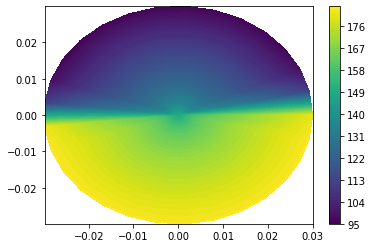

In [187]:
plt.contourf(X,Y,Tp, 100)
plt.colorbar()